<h1>Preprocessing data</h1>

<h2>1️. Installing and importing required libraries</h2>

In [5]:
import pandas as pd
import pandas_ta as ta
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

<h2>2. Analizing the dataset</h2>

<h3> Stock market prices: Yahoo Finance</h3>

In [5]:
def fetch_stock_data(ticker, start, end):
    data = yf.download(ticker, start=start, end=end)
    return data

In [6]:
stock_market_data = fetch_stock_data('AAPL', '2012-01-01', '2025-01-01')
stock_market_data

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2012-01-03,12.375393,12.413612,12.308285,12.320322,302220800
2012-01-04,12.441896,12.479213,12.316707,12.338375,260022000
2012-01-05,12.580021,12.595669,12.418719,12.487333,271269600
2012-01-06,12.711537,12.722070,12.615840,12.632391,318292800
2012-01-09,12.691372,12.872535,12.679936,12.804825,394024400
...,...,...,...,...,...
2024-12-24,257.916443,257.926411,255.009620,255.209412,23234700
2024-12-26,258.735504,259.814335,257.347047,257.906429,27237100


In [7]:
print(stock_market_data.isnull().sum())

Price   Ticker
Close   AAPL      0
High    AAPL      0
Low     AAPL      0
Open    AAPL      0
Volume  AAPL      0
dtype: int64


In [8]:
print(stock_market_data.columns) 
print(len(stock_market_data.columns)) 

MultiIndex([( 'Close', 'AAPL'),
            (  'High', 'AAPL'),
            (   'Low', 'AAPL'),
            (  'Open', 'AAPL'),
            ('Volume', 'AAPL')],
           names=['Price', 'Ticker'])
5


In [9]:
# we will flatten the multi-index columns
stock_market_data.columns = ['_'.join(col).strip() for col in stock_market_data.columns]

if "Date" in stock_market_data.index.names:
    stock_market_data.reset_index(inplace=True)

stock_market_data.columns = ['Date', 'Close_AAPL', 'High_AAPL', 'Low_AAPL', 'Open_AAPL', 'Volume_AAPL']

print(stock_market_data.head())

        Date  Close_AAPL  High_AAPL   Low_AAPL  Open_AAPL  Volume_AAPL
0 2012-01-03   12.375393  12.413612  12.308285  12.320322    302220800
1 2012-01-04   12.441896  12.479213  12.316707  12.338375    260022000
2 2012-01-05   12.580021  12.595669  12.418719  12.487333    271269600
3 2012-01-06   12.711537  12.722070  12.615840  12.632391    318292800
4 2012-01-09   12.691372  12.872535  12.679936  12.804825    394024400


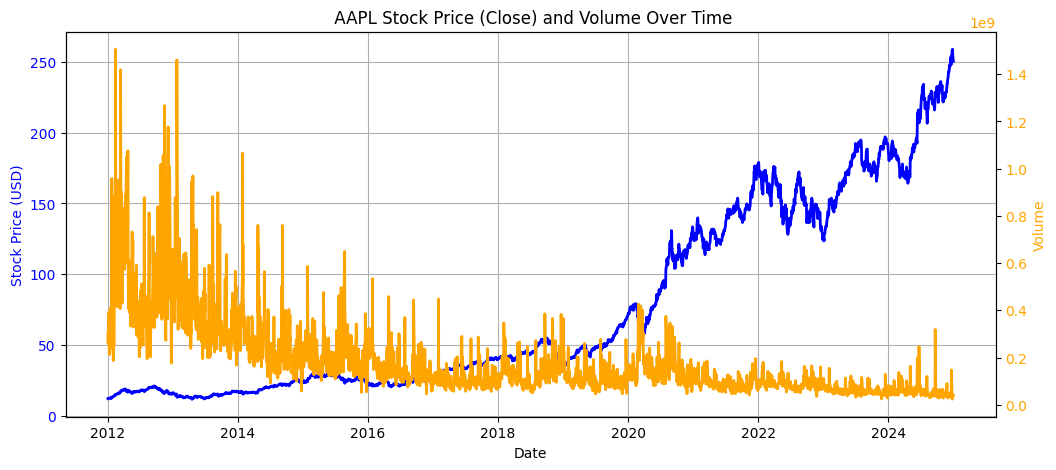

In [10]:
fig, ax1 = plt.subplots(figsize=(12, 5))

ax1.plot(stock_market_data['Date'], stock_market_data["Close_AAPL"], color="blue", label="Close Price", linewidth=2)
ax1.set_xlabel("Date")
ax1.set_ylabel("Stock Price (USD)", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")

ax2 = ax1.twinx()
ax2.plot(stock_market_data['Date'], stock_market_data["Volume_AAPL"], color="orange", label="Volume", linewidth=2)
ax2.set_ylabel("Volume", color="orange")
ax2.tick_params(axis="y", labelcolor="orange")

plt.title(f" AAPL Stock Price (Close) and Volume Over Time")
ax1.grid()

plt.show()

In [11]:
stock_market_data = stock_market_data.dropna()
print(stock_market_data.isnull().sum())

Date           0
Close_AAPL     0
High_AAPL      0
Low_AAPL       0
Open_AAPL      0
Volume_AAPL    0
dtype: int64


In [12]:
stock_market_data['Price_Movement_AAPL'] = (stock_market_data['Close_AAPL'] > stock_market_data['Open_AAPL']).astype(int)

In [21]:
stock_market_data['RSI_Close_AAPL'] = ta.rsi(stock_market_data[('Close_AAPL')], length=90)

macd = ta.macd(stock_market_data['Close_AAPL'])
stock_market_data['MACD_Line_Close_AAPL'] = macd['MACD_12_26_9']  
stock_market_data['MACD_Signal_Close_AAPL'] = macd['MACDs_12_26_9'] 
stock_market_data['MACD_Histogram_Close_AAPL'] = macd['MACDh_12_26_9']  

bollinger = ta.bbands(stock_market_data['Close_AAPL'], length=90)
stock_market_data['Bollinger_Upper_Close_AAPL'] = bollinger['BBU_90_2.0']  
stock_market_data['Bollinger_Lower_Close_AAPL'] = bollinger['BBL_90_2.0']  
stock_market_data['Bollinger_Mid_Close_AAPL'] = bollinger['BBM_90_2.0']

stock_market_data = stock_market_data.dropna()
stock_market_data

,Date,Close_AAPL,High_AAPL,Low_AAPL,Open_AAPL,Volume_AAPL,Price_Movement_AAPL,RSI_Close_AAPL,MACD_Line_Close_AAPL,MACD_Signal_Close_AAPL,MACD_Histogram_Close_AAPL,Bollinger_Upper_Close_AAPL,Bollinger_Lower_Close_AAPL,Bollinger_Mid_Close_AAPL
90,2012-05-11,17.054338,17.287865,16.983318,17.002878,399546000,1,57.613180,-0.194641,-0.100267,-0.094374,20.290343,11.873847,16.082095
91,2012-05-14,16.798847,17.078416,16.780190,16.929755,352626400,0,56.519159,-0.224144,-0.125043,-0.099101,20.269814,11.991197,16.130506
92,2012-05-15,16.646873,16.949314,16.604140,16.896049,476336000,0,55.880877,-0.256828,-0.151400,-0.105428,20.247215,12.104170,16.175693
93,2012-05-16,16.433510,16.758822,16.281838,16.673356,560896000,0,54.999065,-0.296528,-0.180425,-0.116103,20.222052,12.212044,16.217048
94,2012-05-17,15.953218,16.476244,15.953218,16.410339,717220000,0,53.091939,-0.362568,-0.216854,-0.145714,20.188445,12.318137,16.253291
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3265,2024-12-24,257.916443,257.926411,255.009620,255.209412,23234700,1,60.322223,6.067327,5.390177,0.677150,249.694750,211.962378,230.828564
3266,2024-12-26,258.735504,259.814335,257.347047,257.906429,27237100,1,60.495279,6.300019,5.572145,0.727874,250.914110,211.483941,231.199026
3267,2024-12-27,255.309296,258.415896,252.782075,257.546826,42355300,0,59.399379,6.137217,5.685159,0.452057,251.844509,211.204580,231.524545
3268,2024-12-30,251.923019,253.221595,250.474615,251.952985,35557500,0,58.343049,5.669595,5.682047,-0.012451,252.541785,211.085532,231.813658


<h3> Best practice: saving the dataset</h3>

In [22]:
stock_market_data.to_csv('aapl_data.csv', index=True)

<h2>3. Feature Engineering on the data</h2>

In [23]:
stock_market_data = pd.read_csv("aapl_data.csv")

In [24]:
corr_matrix = stock_market_data.select_dtypes(include=["number"]).corr()
corr_matrix

,Close_AAPL,High_AAPL,Low_AAPL,Open_AAPL,Volume_AAPL,Price_Movement_AAPL,RSI_Close_AAPL,MACD_Line_Close_AAPL,MACD_Signal_Close_AAPL,MACD_Histogram_Close_AAPL,Bollinger_Upper_Close_AAPL,Bollinger_Lower_Close_AAPL,Bollinger_Mid_Close_AAPL
Close_AAPL,1.000000,0.999896,0.999895,0.999776,-0.527147,0.039272,0.059164,0.290936,0.300819,0.030339,0.993413,0.984687,0.992349
High_AAPL,0.999896,1.000000,0.999863,0.999897,-0.525784,0.032800,0.057421,0.289504,0.300276,0.027270,0.993757,0.984660,0.992529
Low_AAPL,0.999895,0.999863,1.000000,0.999895,-0.528314,0.033399,0.059495,0.292309,0.302257,0.030423,0.993175,0.984762,0.992249
Open_AAPL,0.999776,0.999897,0.999895,1.000000,-0.526881,0.027159,0.058058,0.290863,0.301783,0.027093,0.993496,0.984622,0.992366
Volume_AAPL,-0.527147,-0.525784,-0.528314,-0.526881,1.000000,-0.058688,-0.217326,-0.174133,-0.172144,-0.042772,-0.521060,-0.519985,-0.522061
Price_Movement_AAPL,0.039272,0.032800,0.033399,0.027159,-0.058688,1.000000,0.071961,0.034880,0.011593,0.079847,0.028401,0.028652,0.028594
RSI_Close_AAPL,0.059164,0.057421,0.059495,0.058058,-0.217326,0.071961,1.000000,0.510499,0.513874,0.096726,-0.008270,-0.029439,-0.017717
MACD_Line_Close_AAPL,0.290936,0.289504,0.292309,0.290863,-0.174133,0.034880,0.510499,1.000000,0.953832,0.353837,0.199539,0.166204,0.185266
MACD_Signal_Close_AAPL,0.300819,0.300276,0.302257,0.301783,-0.172144,0.011593,0.513874,0.953832,1.000000,0.056590,0.213996,0.170644,0.195305
MACD_Histogram_Close_AAPL,0.030339,0.027270,0.030423,0.027093,-0.042772,0.079847,0.096726,0.353837,0.056590,1.000000,-0.003106,0.021084,0.007654


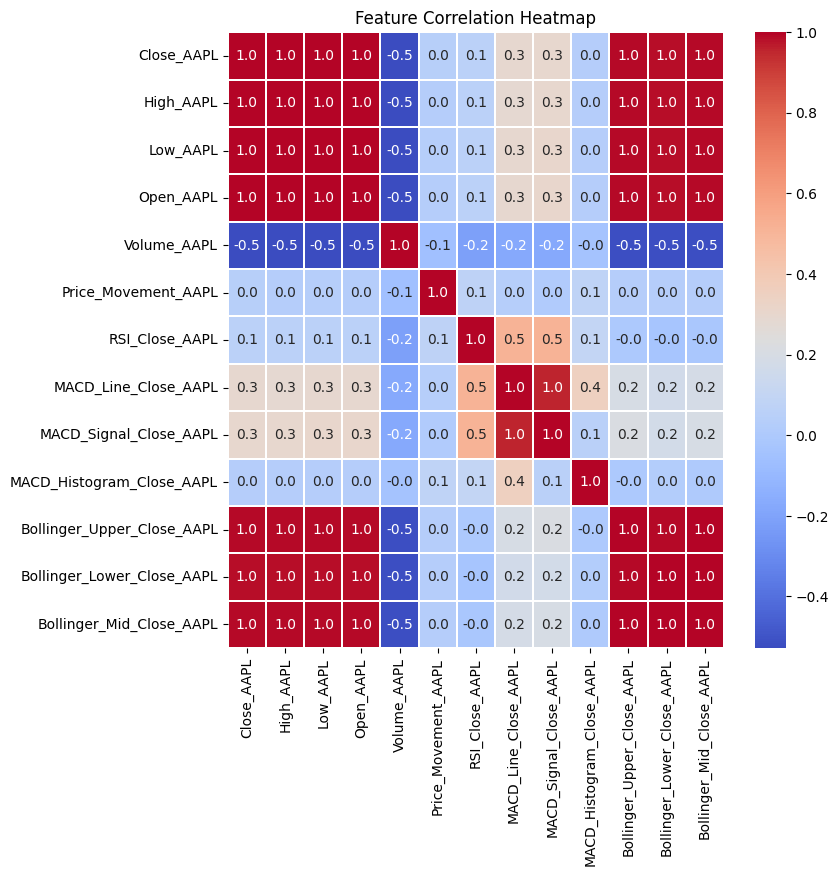

In [26]:
plt.figure(figsize=(8, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".1f", linewidths=0.1)
plt.title("Feature Correlation Heatmap")
plt.show()

<h2>4. Creating the test-train-validate sets</h2>

In [5]:
stock_market_data = pd.read_csv("aapl_data.csv")
important_columns = ['Date', 'Close_AAPL', 'Volume_AAPL', 'RSI_Close_AAPL', 'MACD_Line_Close_AAPL', 'MACD_Signal_Close_AAPL', 'MACD_Histogram_Close_AAPL']
stock_market_data  = stock_market_data[important_columns]
stock_market_data 

,Date,Close_AAPL,Volume_AAPL,RSI_Close_AAPL,MACD_Line_Close_AAPL,MACD_Signal_Close_AAPL,MACD_Histogram_Close_AAPL
0,5/11/2012,17.054338,399546000,57.613180,-0.194641,-0.100267,-0.094374
1,5/14/2012,16.798847,352626400,56.519159,-0.224144,-0.125043,-0.099101
2,5/15/2012,16.646873,476336000,55.880877,-0.256828,-0.151400,-0.105428
3,5/16/2012,16.433510,560896000,54.999065,-0.296528,-0.180425,-0.116103
4,5/17/2012,15.953218,717220000,53.091939,-0.362568,-0.216854,-0.145714
...,...,...,...,...,...,...,...
3175,12/24/2024,257.916443,23234700,60.322223,6.067327,5.390177,0.677150
3176,12/26/2024,258.735504,27237100,60.495279,6.300019,5.572145,0.727874
3177,12/27/2024,255.309296,42355300,59.399379,6.137217,5.685159,0.452057
3178,12/30/2024,251.923019,35557500,58.343049,5.669595,5.682047,-0.012451


In [6]:
train_size = int(0.8 * len(stock_market_data)) 
train_data = stock_market_data.iloc[:train_size]  # first 80%

val_size = int(0.1 * len(stock_market_data))  
val_data = stock_market_data.iloc[train_size:train_size + val_size]  # next 10%

test_data = stock_market_data.iloc[train_size + val_size:]  # remaining 10%

print(f"Train size: {len(train_data)}")
print(f"Validation size: {len(val_data)}")
print(f"Test size: {len(test_data)}")

Train size: 2544
Validation size: 318
Test size: 318


/tmp/ipykernel_1729/1471071820.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Date'] = pd.to_datetime(train_data['Date'])
/tmp/ipykernel_1729/1471071820.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_data['Date'] = pd.to_datetime(val_data['Date'])
/tmp/ipykernel_1729/1471071820.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

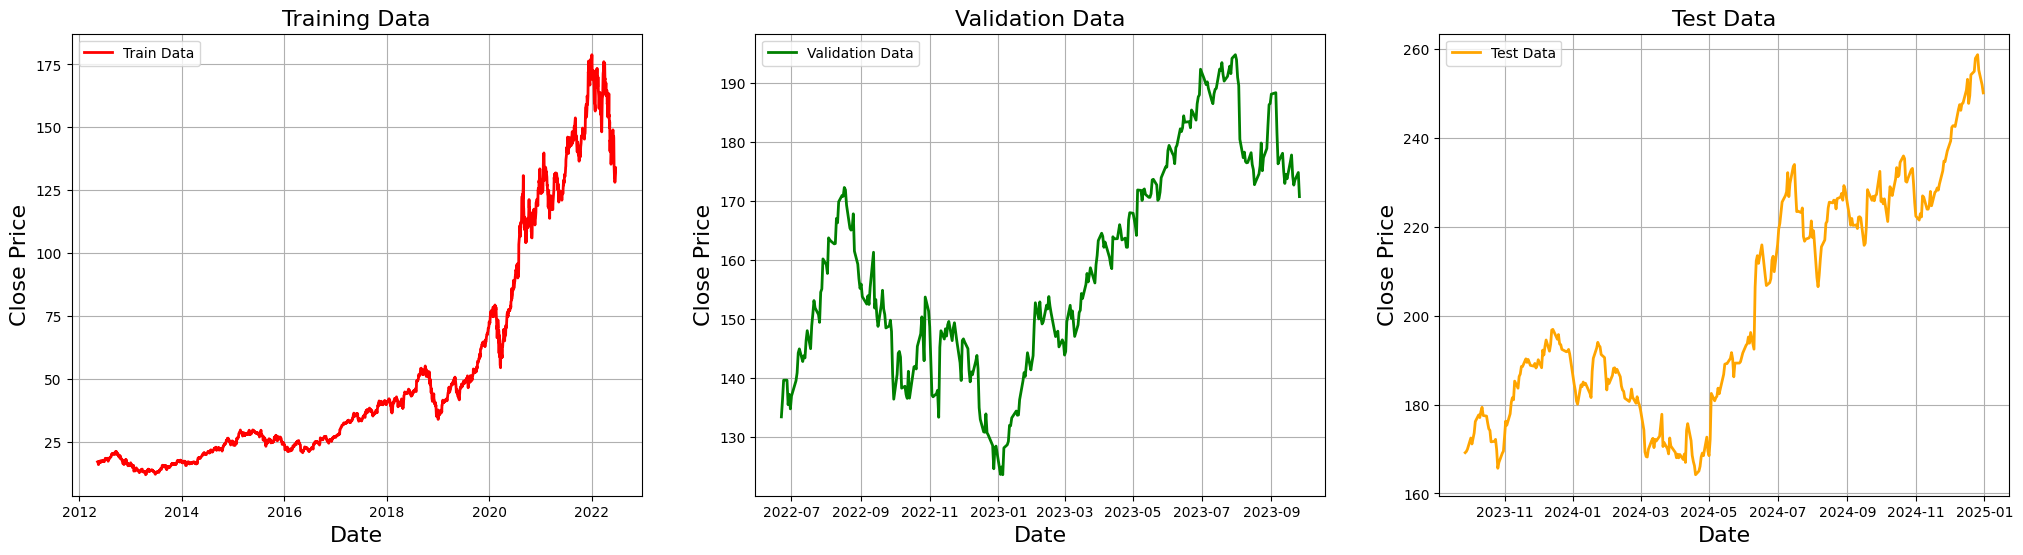

In [7]:
train_data['Date'] = pd.to_datetime(train_data['Date'])
train_data = train_data.sort_values(by="Date")

val_data['Date'] = pd.to_datetime(val_data['Date'])
val_data = val_data.sort_values(by="Date")

test_data['Date'] = pd.to_datetime(test_data['Date'])
test_data = test_data.sort_values(by="Date")

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(25, 6))

ax1.plot(train_data['Date'], train_data['Close_AAPL'], color='red', label='Train Data', linewidth=2)
ax1.set_xlabel("Date", fontsize=16)
ax1.set_ylabel("Close Price", fontsize=16)
ax1.set_title("Training Data", fontsize=16)
ax1.legend()
ax1.grid(True)

ax2.plot(val_data['Date'], val_data['Close_AAPL'], color='green', label='Validation Data', linewidth=2)
ax2.set_xlabel("Date", fontsize=16)
ax2.set_ylabel("Close Price", fontsize=16)
ax2.set_title("Validation Data", fontsize=16)
ax2.legend()
ax2.grid(True)

ax3.plot(test_data['Date'], test_data['Close_AAPL'], color='orange', label='Test Data', linewidth=2)
ax3.set_xlabel("Date", fontsize=16)
ax3.set_ylabel("Close Price", fontsize=16)
ax3.set_title("Test Data", fontsize=16)
ax3.legend()
ax3.grid(True)

plt.show()

In [8]:
stock_market_data.describe()

,Close_AAPL,Volume_AAPL,RSI_Close_AAPL,MACD_Line_Close_AAPL,MACD_Signal_Close_AAPL,MACD_Histogram_Close_AAPL
count,3180.000000,3.180000e+03,3180.000000,3180.000000,3180.000000,3180.000000
mean,78.192815,1.696516e+08,53.950287,0.495151,0.488055,0.007096
std,66.199798,1.469200e+08,5.139606,1.859022,1.741547,0.559238
min,11.925924,2.323470e+07,41.265606,-6.511135,-5.672585,-2.477585
25%,24.446124,7.859062e+07,50.445426,-0.247956,-0.215299,-0.142231
50%,43.591831,1.179022e+08,54.301677,0.258274,0.250270,0.005218
75%,140.858799,2.039644e+08,57.266196,1.042672,0.959792,0.166281
max,258.735504,1.460852e+09,68.233948,8.925402,8.292326,2.336554


The data is non-stationary (wide range of values across time), especially Close_AAPL, so scaling is necessary before modeling.

The technical indicators (MACD, RSI) are centered and balanced, which is good — no preprocessing issues.

Therefore, we will use the [0,1] range to normalize all features.

<h2>5. Scaling the sets</h2>

In [9]:
train_data

,Date,Close_AAPL,Volume_AAPL,RSI_Close_AAPL,MACD_Line_Close_AAPL,MACD_Signal_Close_AAPL,MACD_Histogram_Close_AAPL
0,2012-05-11,17.054338,399546000,57.613180,-0.194641,-0.100267,-0.094374
1,2012-05-14,16.798847,352626400,56.519159,-0.224144,-0.125043,-0.099101
2,2012-05-15,16.646873,476336000,55.880877,-0.256828,-0.151400,-0.105428
3,2012-05-16,16.433510,560896000,54.999065,-0.296528,-0.180425,-0.116103
4,2012-05-17,15.953218,717220000,53.091939,-0.362568,-0.216854,-0.145714
...,...,...,...,...,...,...,...
2539,2022-06-14,130.835052,84784300,45.132760,-4.224114,-3.407262,-0.816852
2540,2022-06-15,133.466339,91533000,45.752701,-4.380128,-3.601835,-0.778293
2541,2022-06-16,128.174225,108123900,44.724921,-4.874607,-3.856390,-1.018218
2542,2022-06-17,129.652466,134520300,45.073446,-5.088547,-4.102821,-0.985726


In [10]:
features_for_close_price = ['Volume_AAPL', 'RSI_Close_AAPL', 'MACD_Line_Close_AAPL', 'MACD_Signal_Close_AAPL', 'MACD_Histogram_Close_AAPL']

scaler_features = MinMaxScaler(feature_range=(0, 1))
scaler_target = MinMaxScaler(feature_range=(0, 1))

scaled_features = scaler_features.fit_transform(train_data[features_for_close_price])
scaled_target = scaler_target.fit_transform(train_data[['Close_AAPL']])

In [11]:
scaled_train_data = pd.DataFrame(scaled_features, columns=features_for_close_price, index=train_data.index)
scaled_train_data.insert(0, 'Close_AAPL', scaled_target)
scaled_train_data.insert(0, 'Date', train_data['Date'])
scaled_train_data

,Date,Close_AAPL,Volume_AAPL,RSI_Close_AAPL,MACD_Line_Close_AAPL,MACD_Signal_Close_AAPL,MACD_Histogram_Close_AAPL
0,2012-05-11,0.030718,0.252523,0.606176,0.455456,0.448157,0.492594
1,2012-05-14,0.029187,0.219478,0.565610,0.453329,0.446164,0.491607
2,2012-05-15,0.028277,0.306607,0.541942,0.450972,0.444045,0.490286
3,2012-05-16,0.026999,0.366162,0.509244,0.448109,0.441710,0.488058
4,2012-05-17,0.024122,0.476261,0.438527,0.443347,0.438780,0.481878
...,...,...,...,...,...,...,...
2539,2022-06-14,0.712227,0.030837,0.143396,0.164908,0.182190,0.341791
2540,2022-06-15,0.727987,0.035590,0.166384,0.153658,0.166541,0.349840
2541,2022-06-16,0.696289,0.047275,0.128273,0.118003,0.146069,0.299760
2542,2022-06-17,0.705144,0.065866,0.141197,0.102577,0.126249,0.306542


In [12]:
val_data

,Date,Close_AAPL,Volume_AAPL,RSI_Close_AAPL,MACD_Line_Close_AAPL,MACD_Signal_Close_AAPL,MACD_Histogram_Close_AAPL
2544,2022-06-22,133.387528,73409200,45.960762,-4.665266,-4.336353,-0.328913
2545,2022-06-23,136.265198,72433800,46.624600,-4.230490,-4.315181,0.084691
2546,2022-06-24,139.606033,89116800,47.383426,-3.575137,-4.167172,0.592035
2547,2022-06-27,139.606033,70207900,47.383426,-3.020942,-3.937926,0.916984
2548,2022-06-28,135.447205,67083400,46.541141,-2.884075,-3.727156,0.843081
...,...,...,...,...,...,...,...
2857,2023-09-20,174.213150,58436200,51.026111,-1.770482,-1.474251,-0.296231
2858,2023-09-21,172.664505,63047900,50.558933,-1.971028,-1.573606,-0.397422
2859,2023-09-22,173.518219,56725400,50.809995,-2.037587,-1.666402,-0.371185
2860,2023-09-25,174.798859,46172700,51.186008,-1.964354,-1.725993,-0.238362


In [13]:
# we use the scaler fitted on train_data
scaled_val_features = scaler_features.transform(val_data[features_for_close_price])
scaled_val_target = scaler_target.transform(val_data[['Close_AAPL']])

scaled_val_data = pd.DataFrame(scaled_val_features, columns=features_for_close_price, index=val_data.index)
scaled_val_data.insert(0, 'Close_AAPL', scaled_val_target)
scaled_val_data.insert(0, 'Date', val_data['Date'])
scaled_val_data

,Date,Close_AAPL,Volume_AAPL,RSI_Close_AAPL,MACD_Line_Close_AAPL,MACD_Signal_Close_AAPL,MACD_Histogram_Close_AAPL
2544,2022-06-22,0.727515,0.022826,0.174099,0.133098,0.107467,0.443639
2545,2022-06-23,0.744752,0.022139,0.198714,0.164448,0.109170,0.529970
2546,2022-06-24,0.764762,0.033889,0.226852,0.211702,0.121074,0.635867
2547,2022-06-27,0.764762,0.020571,0.226852,0.251663,0.139511,0.703694
2548,2022-06-28,0.739852,0.018371,0.195620,0.261532,0.156462,0.688268
...,...,...,...,...,...,...,...
2857,2023-09-20,0.972048,0.012280,0.361925,0.341829,0.337654,0.450460
2858,2023-09-21,0.962772,0.015528,0.344601,0.327368,0.329663,0.429339
2859,2023-09-22,0.967885,0.011075,0.353911,0.322569,0.322200,0.434815
2860,2023-09-25,0.975556,0.003643,0.367854,0.327849,0.317407,0.462539


In [14]:
test_data

,Date,Close_AAPL,Volume_AAPL,RSI_Close_AAPL,MACD_Line_Close_AAPL,MACD_Signal_Close_AAPL,MACD_Histogram_Close_AAPL
2862,2023-09-27,169.189957,66921800,49.504893,-2.499965,-1.958366,-0.541599
2863,2023-09-28,169.448074,56294400,49.582581,-2.677389,-2.102171,-0.575218
2864,2023-09-29,169.964310,51814200,49.738974,-2.744704,-2.230678,-0.514027
2865,2023-10-02,172.485809,52164500,50.497425,-2.565020,-2.297546,-0.267474
2866,2023-10-03,171.145630,49594600,50.091156,-2.501919,-2.338421,-0.163498
...,...,...,...,...,...,...,...
3175,2024-12-24,257.916443,23234700,60.322223,6.067327,5.390177,0.677150
3176,2024-12-26,258.735504,27237100,60.495279,6.300019,5.572145,0.727874
3177,2024-12-27,255.309296,42355300,59.399379,6.137217,5.685159,0.452057
3178,2024-12-30,251.923019,35557500,58.343049,5.669595,5.682047,-0.012451


In [15]:
# we use the scaler fitted on train_data
scaled_test_features = scaler_features.transform(test_data[features_for_close_price])
scaled_test_target = scaler_target.transform(test_data[['Close_AAPL']])

scaled_test_data = pd.DataFrame(scaled_test_features, columns=features_for_close_price, index=test_data.index)
scaled_test_data.insert(0, 'Close_AAPL', scaled_test_target)
scaled_test_data.insert(0, 'Date', test_data['Date'])
scaled_test_data

,Date,Close_AAPL,Volume_AAPL,RSI_Close_AAPL,MACD_Line_Close_AAPL,MACD_Signal_Close_AAPL,MACD_Histogram_Close_AAPL
2862,2023-09-27,0.941960,0.018257,0.305517,0.289229,0.298718,0.399245
2863,2023-09-28,0.943506,0.010772,0.308398,0.276435,0.287153,0.392227
2864,2023-09-29,0.946598,0.007616,0.314197,0.271582,0.276817,0.405000
2865,2023-10-02,0.961701,0.007863,0.342321,0.284538,0.271439,0.456463
2866,2023-10-03,0.953674,0.006053,0.327256,0.289088,0.268152,0.478165
...,...,...,...,...,...,...,...
3175,2024-12-24,1.473403,-0.012512,0.706629,0.906980,0.889729,0.653634
3176,2024-12-26,1.478309,-0.009693,0.713046,0.923759,0.904364,0.664221
3177,2024-12-27,1.457787,0.000955,0.672410,0.912020,0.913453,0.606650
3178,2024-12-30,1.437504,-0.003833,0.633240,0.878301,0.913203,0.509693


<h2>6. Creating Sequences: LookBack Window</h2>

In [16]:
def create_sequences(data, sequence_size, target_attr_idx):
    data = data.values  # numpy format is a must

    data_X = []
    data_y = []

    for i in range(sequence_size, len(data)):
        data_X.append(data[i-sequence_size:i, :])  # all columns
        data_y.append(data[i, target_attr_idx])    # only the target column

    return np.array(data_X), np.array(data_y)

In [17]:
#we want to look backwards 90 days
sequence_size = 90

all_the_columns_without_date = ['Close_AAPL', 'Volume_AAPL', 'RSI_Close_AAPL', 'MACD_Line_Close_AAPL', 'MACD_Signal_Close_AAPL', 'MACD_Histogram_Close_AAPL']
scaled_train_data = scaled_train_data[all_the_columns_without_date]
scaled_val_data = scaled_val_data[all_the_columns_without_date]
scaled_test_data = scaled_test_data[all_the_columns_without_date]

# we construct the training dataset
X_train, y_train = create_sequences(scaled_train_data, sequence_size, 0)

# we construct the validation dataset
X_val, y_val = create_sequences(scaled_val_data, sequence_size, 0)

# we construct the test dataset
X_test, y_test = create_sequences(scaled_test_data, sequence_size, 0)

In [18]:
print(f"\n Data Train Scaled Shape: {scaled_train_data.shape}")
print(f"> Train data X Shape: {X_train.shape}")
print(f"> Train data y Shape: {y_train.shape}")

print(f"\n Validation data Scaled Shape: {scaled_val_data.shape}")
print(f"> Validation data X Shape: {X_val.shape}")
print(f"> Validation data y Shape: {y_val.shape}")

print(f"\n Test data Scaled Shape: {scaled_test_data.shape}")
print(f"> Test data X Shape: {X_test.shape}")
print(f"> Test data y Shape: {y_test.shape}")


 Data Train Scaled Shape: (2544, 6)
> Train data X Shape: (2454, 90, 6)
> Train data y Shape: (2454,)

 Validation data Scaled Shape: (318, 6)
> Validation data X Shape: (228, 90, 6)
> Validation data y Shape: (228,)

 Test data Scaled Shape: (318, 6)
> Test data X Shape: (228, 90, 6)
> Test data y Shape: (228,)


In [19]:
num_uptrends_train = (scaled_train_data['Close_AAPL'].diff() > 0).sum()
num_downtrends_train = (scaled_train_data['Close_AAPL'].diff() < 0).sum()
print(f"Uptrends: {num_uptrends_train}, Downtrends: {num_downtrends_train}")

num_uptrends_test = (test_data['Close_AAPL'].diff() > 0).sum()
num_downtrends_test= (test_data['Close_AAPL'].diff() < 0).sum()
print(f"Uptrends: {num_uptrends_test}, Downtrends: {num_downtrends_test}")

Uptrends: 1334, Downtrends: 1205
Uptrends: 179, Downtrends: 137


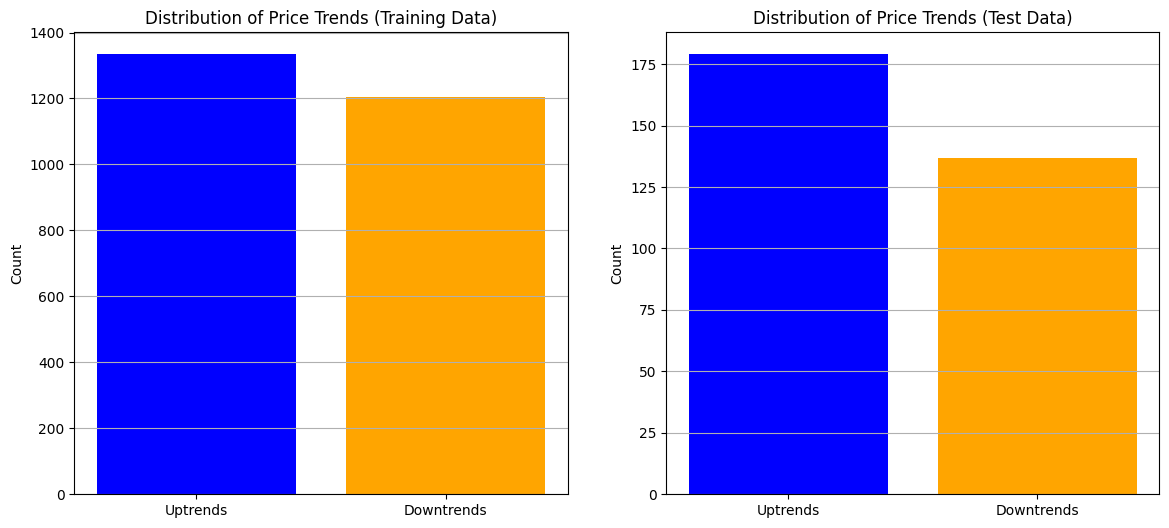

In [20]:
labels = ['Uptrends', 'Downtrends']
train_values = [num_uptrends_train, num_downtrends_train]
test_values = [num_uptrends_test, num_downtrends_test]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
ax1.bar(labels, train_values, color=['blue', 'orange'])
ax1.set_ylabel("Count")
ax1.set_title("Distribution of Price Trends (Training Data)")
ax1.grid(axis='y')

ax2.bar(labels, test_values, color=['blue', 'orange'])
ax2.set_ylabel("Count")
ax2.set_title("Distribution of Price Trends (Test Data)")
ax2.grid(axis='y')

plt.show()